In [1]:
# Import relevant Python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
data = pd.read_csv("marketing_sales_data.csv")
data

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830



# data exploration and cleaning

In [3]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


In [4]:
data['Influencer'].unique()

array(['Micro', 'Mega', 'Nano', 'Macro'], dtype=object)

In [5]:
data['TV'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

The data shows TV, Radio,Social Media ,Influencer, Sales,for each market represented.

In [6]:
#number of row and column
data.shape


(572, 5)

There are 572 rows and 5 columns in the data. This means that 572 marketing  are represented in the data, and the data contains 7 aspects of each marketing .

In [7]:
#checking for the missing value
data.isna().count()

TV              572
Radio           572
Social Media    572
Influencer      572
Sales           572
dtype: int64

In [8]:
data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [9]:
data.isna().any(axis=1).sum()

0

In [10]:
data = data.dropna(axis=0)

# Exploratory Data Analysis and Regression



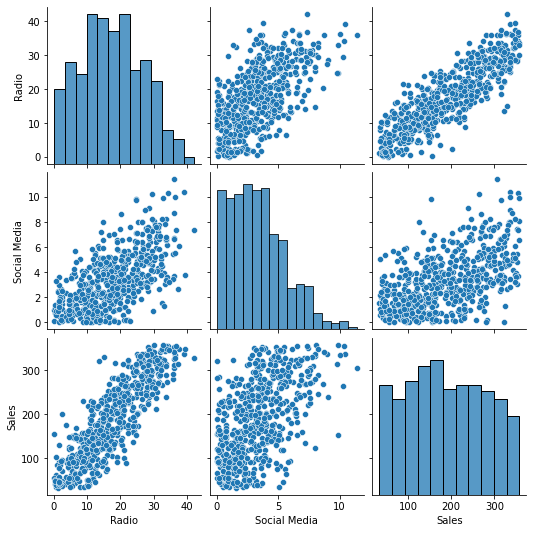

In [11]:
 #Visualize pairwise relationships between variables in the data
sns.pairplot(data=data)
plt.show()

# Linearity
Let's check if the assumption of linearity is met.

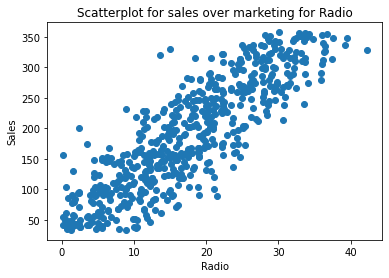

In [12]:
# draw the scatter plot radio vs sales
plt.scatter(data["Radio"], data["Sales"])
plt.title("Scatterplot for sales over marketing for Radio")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

The points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it looks like the assumption of linearity is met.

# Normality
Let's  check if both Radio and Sales are normally distributed (or close to being normally distributed). If they are, then it is likely that the residuals are also normally distributed, which you can check after you build the model.

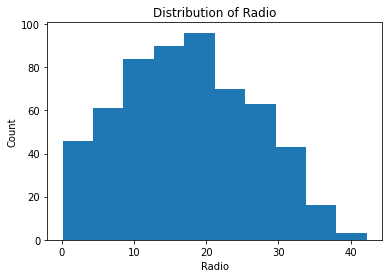

In [13]:
# Check if Radio is normally distributed

plt.hist(data["Radio"])
plt.title("Distribution of Radio")
plt.xlabel("Radio")
plt.ylabel("Count")
plt.show()

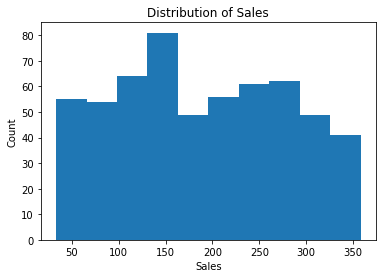

In [14]:
# Check if Salesis normally distributed

plt.hist(data["Sales"])
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

Both the distribution of Radio and the distribution of Sales look approximately normal.

# Build Model
Let's start by selecting only the columns that are needed for the model that you will build from the data

In [15]:
# Select relevant columns
# Save resulting dataframe in a separate variable to prepare for regression

ols_data = data[["Radio", "Sales"]]

# Take a look at the subset to make sure it looks right

ols_data

,Radio,Sales
0,3.518070,55.261284
1,7.756876,67.574904
2,20.348988,272.250108
3,20.108487,195.102176
4,31.653200,273.960377
...,...,...
567,14.656633,191.521266
568,28.110171,297.626731
569,11.401084,145.416851
570,21.119991,209.326830


In [16]:
# Write the linear regression formula for modeling the relationship between Radio and Sales 
# Save it in a variable

ols_formula = "Sales ~ Radio"

# Take a look at the formula to make sure it looks right

ols_formula

'Sales ~ Radio'

In [17]:
# implementing the Ordinary Least Squares (OLS) approach for linear regression.

OLS = ols(formula = ols_formula, data = ols_data)

In [18]:
# create a linear regression model for the data, fit the model to the data.
# Save the fitted model in a variable

model = OLS.fit()

In [19]:
#get a summary of the results from the model.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          4.38e-167
Time:                        21:02:13   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from the linear equation (y=mx+c)
The y-intercept is 43.8789.

The slope is 8.2998.

y = slope * x + y-intercept.

Sales =8.2998 * Radio + 43.8789


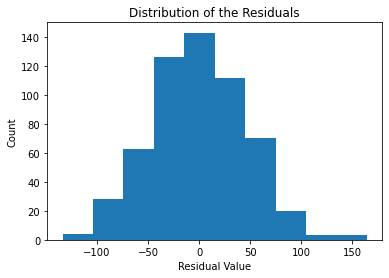

In [20]:
#Get the residuals from the model

residuals = model.resid

# Check if the residuals are normally distributed

plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

In [21]:
residuals

0     -17.817004
1     -40.684714
2      59.478221
3     -15.673594
4     -32.634439
         ...    
567    25.994900
568    20.438417
569     6.910957
570    -9.844248
571   -17.839686
Length: 572, dtype: float64

Based on the histogram above, the distribution of the residuals is approximately normal. So it looks like the assumption of normaliy is met.

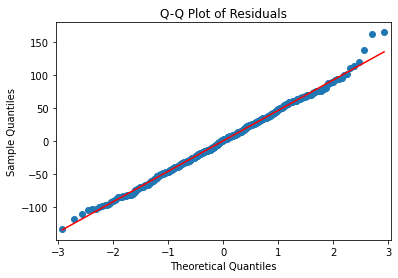

In [22]:
#Confirm normality with a Q-Q plot.
# Create a Q-Q plot to confirm normality assumption 

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In the Q-Q plot above, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met

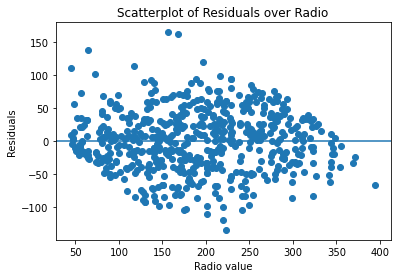

In [25]:
#Check if the assumption of homoskedasticity is met.
# Get the X values

X = ols_data["Radio"]

# Get the fitted values
Radio_value = model.predict(X)

# Create a scatter plot

plt.scatter(Radio_value, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Radio")
plt.xlabel("Radio value")
plt.ylabel("Residuals")
plt.show()

# Radio_value

The points on the plot above resemble a random cloud. There is no clear pattern along the residual values. So it looks like the assumption of homoskedasticity is met.

# conclusion

In the simple linear regression model, the y-intercept is 43.8789 and the slope is 8.2998. One interpretation: If an advertisment on Radio goes on air once  the sales will increase by 8.2998 on average

Based on the dataset at hand and regression analysis, there is a notable relationship between Radio and Sales for market,Hence  if you allocate many advertisment about the product  on different radio station and in every Radio session the sales will increase accordingly to the advertisment made  
